# Astronomy 8824 - Numerical and Statistical Methods in Astrophysics

## Numerical Methods Topic III. Root Finding and Minimization

These notes are for the course Astronomy 8824: Numerical and Statistical Methods in Astrophysics. It is based on notes from David Weinberg with modifications and additions by Paul Martini.
David's original notes are available from his website: http://www.astronomy.ohio-state.edu/~dhw/A8824/index.html

#### Background reading: 
- Numerical Recipes, Chapter 9 (especially 9.0, 9.1, and 9.4) 
- Numerical Recipes, Chapter 10 (especially 10.0, 10.1, 10.2, and 10.4) 
- Numerical Recipes, $\S 10.5$ for the Nelder-Mead Algorithm
- Numerical Recipes, $\S 15.5.2$ for the Levenberg-Marquardt Algorithm


In [11]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import optimize

# matplotlib settings 
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('lines', linewidth=2)
plt.rc('axes', linewidth=2)
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

### Solving Equations

Consider the general case of solving some equations:
$$
\vec f (\vec x) = 0
$$
If there is only one independent variable, the problem is one-dimensional and the solution is equivalent to finding the root or roots. Here is an overview for how to choose the best method. In the one-dimensional case:
- linear and quadratic cases are trivial
- higher order, nonlinear cases can be more complex, require numerical methods, and may have roots and/or singularities
- remember that it is basically never a bad idea to make a plot!

In the N-dimensional case (system of N equations)
- if linear and non-degenerate, use matrix methods to solve the system of equations
- if non-linear, use numerical methods

There are no guarantees that there will be a (real) solution to non-linear equations, or there may be more than one. This is a big difference between the 1-D and N-D cases. In the 1-D case, it is possible to trap (or bracket) a root and track it down numerically. In the N-D case, you can not be sure it exists until you find it. 

In either case, good starting guesses are important, and this is especially important in N-D. It is also important to make sure you bracket a root before you try to converge. 

Lastly, it is good to ponder Hamming's Motto: _The purpose of computing is insight, not numbers._ 

### An example

We'll discuss two general algorithms for the 1-d case, but
sometimes one has a simple non-linear problem for which there
is an easy special-purpose iterative solution.

For example, how do you solve $x + \ln(x) = 7$?

Of course, you could (and should) make a plot first:

Graphically we can see that the solution is between 5.2 and 5.4


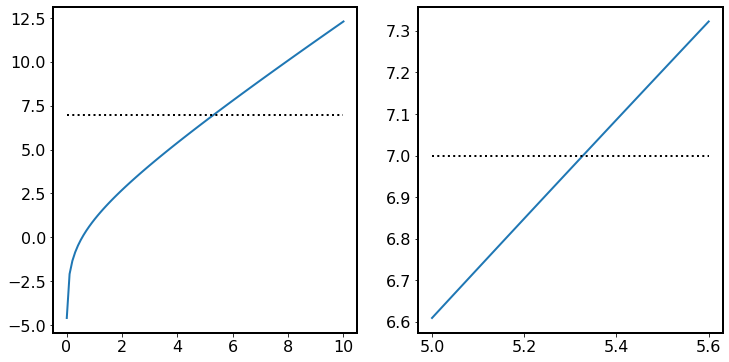

In [9]:
def func1(x):
    return x + np.log(x) 

fig, axarr = plt.subplots(1, 2, figsize=(12,6))

val = 7

a = 0.01
b = 10
x = np.linspace(a, b, 100)
axarr[0].plot(x, func1(x))
axarr[0].plot([a, b], [val, val], 'k:')

a = 5
b = 5.6
x = np.linspace(a, b, 100)
axarr[1].plot(x, func1(x))
axarr[1].plot([a, b], [val, val], 'k:')

print("Graphically we can see that the solution is between 5.2 and 5.4")

In [3]:
# Now let's try to solve it iteratively: 

x=7

for iter in range(10):
    print (iter,x,func1(x))
    x+=7-func1(x)
    
print("  Converges on about {}".format(x))

0 7 8.945910149055313
1 5.0540898509446865 6.674287637937203
2 5.379802213007483 7.062453823123878
3 5.317348389883605 6.9883231460289394
4 5.329025243854666 7.002193584229712
5 5.326831659624954 6.999588285713562
6 5.327243373911392 7.000077287664175
7 5.3271660862472165 6.999985491891509
8 5.327180594355707 7.000002723415883
9 5.327177870939824 6.999999488769617
  Converges on about 5.3271783821702074


This iterative approach worked well, but it is not always so straightforward. Consider the case $x + \ln(x) = 0.7$.

In [4]:
x = 0.7
for iter in range(10):
    print (iter,x,func1(x))
    x+=(0.7-func1(x))
    
print("The solution is clearly not converging")

0 0.7 0.3433250560612675
1 1.0566749439387324 1.111802076509635
2 0.6448728674290973 0.20617078105394704
3 1.1387020863751502 1.2685911794509344
4 0.5701109069242158 0.008186543394952173
5 1.2619243635292636 1.4945621920401884
6 0.4673621714890752 -0.2932886225766057
7 1.460650794065681 1.839532879829248
8 0.3211179142364329 -0.8148289749964459
9 1.8359468892328787 2.443507253579699
The solution is clearly not converging


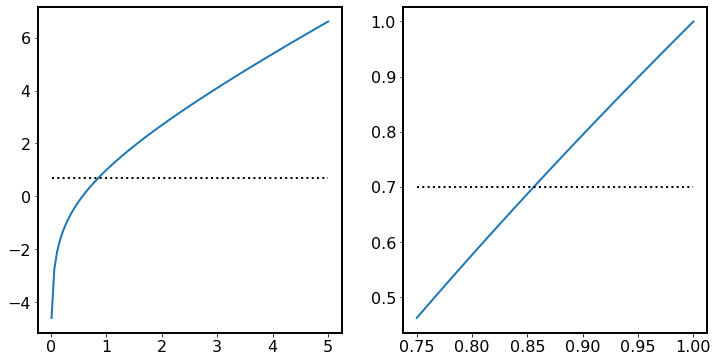

In [5]:
# Let's look at the function around 0.7 to understand this behavior

fig, axarr = plt.subplots(1, 2, figsize=(12,6))

val = 0.7

a = 0.01
b = 5
x = np.linspace(a, b, 100)
axarr[0].plot(x, func1(x))
axarr[0].plot([a, b], [val, val], 'k:')

a = 0.75
b = 1
x = np.linspace(a, b, 100)
axarr[1].plot(x, func1(x))
axarr[1].plot([a, b], [val, val], 'k:')

In this case the iteration method is overcorrecting, so that successive steps are getting bigger rather than smaller and oscillating wildly around the solution. In cases such as this, it is sometimes sufficient to just take a fraction of the correction, provided you know that your correction is in the right direction.

For example, try the 0.7 problem by multiplying the iteration step by 0.2: 

In [6]:
x = 0.7

for iter in range(10):
    print (iter,x,func1(x))
    x+=0.2*(0.7-func1(x))
    
print("Now the solution is converging on {}".format(x))

0 0.7 0.3433250560612675
1 0.7713349887877464 0.5117024751132088
2 0.8089944937651047 0.5970313255946933
3 0.829588228646166 0.6427624172864972
4 0.8410357451888666 0.6679146284736677
5 0.8474528194941331 0.6819327080035452
6 0.851066277893424 0.6898010068179379
7 0.8531060765298365 0.6942346943180459
8 0.8542591376662273 0.6967384463342836
9 0.8549114483993706 0.6981540638667987
Now the solution is converging on 0.8552806356260109


### Bisection

The key first step in solving for the value for a root is to identify an interval that contains a root. Mathematically, you can be sure that there is a root on the interval $(x_1,x_2)$ if 

$$
f(x_1) \times f(x_2) < 0.
$$

Note that while this guarantees that at least one root (and more generally an odd number) is present on the interval, it will miss roots if there is an even number. 

To illustrate this, in the previous case our plot showed that there was a root of
$$
x + \ln(x) = 0.7
$$
on the interval (0.5, 1). In this case:

In [10]:
x1 = 0.5
x2 = 1.0
(func1(x1)-0.7)*(func1(x2)-0.7)

-0.2679441541679836

The **Bisection** method uses this fact, progressively splits the interval in two, and determines which half of the interval contains the root. The steps are:

1. Find an interval such that $f(x_1) f(x_2) < 0.$ 
2. Evaluate $f(x_m)$ at $x_m = (x_1+x_2)/2$
3. Determine if the root is on ($x_1$,$x_m$) or ($x_m, x_2$) and use the result to define a new interval.
4. Repeat steps 2 and 3 on the new interval until you've reached your desired convergence.

Each iteration decreass the interval by a factor of two. The corresponding tolerance of each new step is a factor of two better than the previous one, or $\epsilon_{n+1} = \epsilon_n/2. 

To achieve a tolerance $\epsilon$ requires 
$$
n = \log_2 \frac{\epsilon_0}{\epsilon}
$$
where $\epsilon_0$ is the starting interval. This is **linear convergence**. This is fairly slow compared to some methods, but the advantages are that it is 1) easy to code and 2) always will converge. The Bisection method is consequently a great workhorse.

What are good convergence criteria? This will be set by your application, but you do need to consider machine precision. An absolute value of $10^{-6}$ is reasonable for an interval near 1 for single precision, but it is not reasonable for an interval near $10^{50}$!

A good way to estimate what is obtainable is to use
$$
\epsilon \frac{|x_1| + |x_2|}{2}
$$
where $\epsilon$ is the machine precision, that is $10^{-6}$ for single precison and $10^{-15}$ for double. 



In [70]:
a = 0.5
b = 1.0

# Here is the python implementation of bisect: 
print("Machine precision is epsilon = {}".format(np.finfo(float).eps))
tol = 10.*np.finfo(float).eps # aim for a tolerance well above machine precision
print("Specify a tolerance of {}".format(tol))

root, info = optimize.bisect(func1, a, b, xtol=tol, full_output=True)
print("Output from optimize.bisect(): ")
print(info)

Machine precision is epsilon = 2.220446049250313e-16
Specify a tolerance of 2.220446049250313e-15
Output from optimize.bisect(): 
      converged: True
           flag: 'converged'
 function_calls: 50
     iterations: 48
           root: 0.5671432904097831


Note the number of iterations and function calls.

In [71]:
a = 0.5
b = 1.0

# Alternatively use root_scalar(), which has options for different solvers
optimize.root_scalar(func1, method='bisect', bracket=(a, b), xtol=tol)

      converged: True
           flag: 'converged'
 function_calls: 50
     iterations: 48
           root: 0.5671432904097831

### Secant and False Position

If the function is smooth near a root, the **False Position** and **Secant** methods generally converge faster than Bisection. 

Both Secant and False Position assume that the function is approximately linear and take the next point as the the point where the line crosses the axis. 

**Secant Method**
- interpolates between the two most recently evaluated points
- it is arbitrary which limit of the interval is the first one

**False Position**
- interpolates between the two most recent points that _bracket_ the root, not necessarily the most points. 
- this method has a lower order of convergence, and is sometimes superlinear

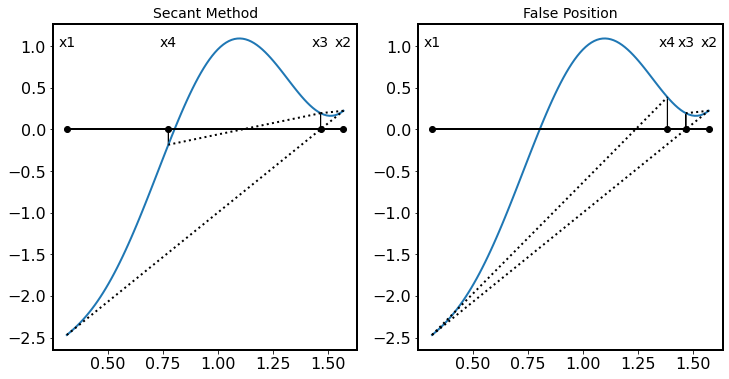

In [72]:
fig, axarr = plt.subplots(1, 2, figsize=(12,6))

def f(x):
    # return np.cos(x)
    return np.pi*x - x*np.sin(5.*x) - np.pi

val = 0.0
xlabels = ['x1', 'x2', 'x3', 'x4']
x1 = 0.1*np.pi
x2 = 0.5*np.pi
x = np.linspace(x1, x2, 100)

# Illustration of the Secant Method
axarr[0].plot(x, f(x))
axarr[0].plot([x1, x2], [val, val], 'k')
axarr[0].set_title("Secant Method")
# linear interpolation on the initial interval (x1, x2)
m = (f(x2) - f(x1))/(x2-x1) 
b = f(x2) - m*x2
x3 = -b/m
axarr[0].plot([x1, x2], [f(x1), f(x2)], 'k:')
axarr[0].arrow(x3, 0, 0, f(x3))
axarr[0].plot([x2, x3], [f(x2), f(x3)], 'k:')
# Secant uses (x2, x3) to refine the interval:
m = (f(x3) - f(x2))/(x3-x2) 
b = f(x3) - m*x3
x4 = -b/m
axarr[0].arrow(x4, 0, 0, f(x4))
axarr[0].plot([x3, x4], [f(x3), f(x4)], 'k:')
xvals = [x1, x2, x3, x4]
for i, xval in enumerate(xvals):
    axarr[0].plot(xval, 0, 'ko')
    axarr[0].text(xval, 1, xlabels[i], ha='center')

# Illustration of the False Position Method
axarr[1].plot(x, f(x))
axarr[1].plot([x1, x2], [val, val], 'k')
axarr[1].set_title("False Position")
# linear interpolation on the initial interval (x1, x2)
m = (f(x2) - f(x1))/(x2-x1) 
b = f(x2) - m*x2
x3 = -b/m
axarr[1].plot([x1, x2], [f(x1), f(x2)], 'k:')
axarr[1].arrow(x3, 0, 0, f(x3))
axarr[1].plot([x2, x3], [f(x2), f(x3)], 'k:')
# False Position uses the two most recent points that bracket the root
m = (f(x1) - f(x3))/(x1-x3) 
b = f(x1) - m*x1
x4 = -b/m
axarr[1].arrow(x4, 0, 0, f(x4))
axarr[1].plot([x1, x4], [f(x1), f(x4)], 'k:')
xvals = [x1, x2, x3, x4]
for i, xval in enumerate(xvals):
    axarr[1].plot(xval, 0, 'ko')
    axarr[1].text(xval, 1, xlabels[i], ha='center')


The Secant method converges more rapidly near a root of a sufficiently continuous function. The convergence is:

$$
\lim_{k \to \infty} |\epsilon_{k+1}| \approx \mathrm{const} \times |\epsilon_k|^{1.618}
$$

Yet the 'sufficiently continuous' qualifier is really important. If this condition is not met, the root may not remain bracketed and the method won't converge. 

False Position has a lower order of convergence, as it sometimes keeps the previous iteration. 

In [73]:
# Use the secant method with root_scalar()
a = 0.5
b = 1.0
optimize.root_scalar(func1, method='secant', bracket=(a, b), x0=a, x1=b, xtol=tol)

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 0.567143290409784

Note the number of iterations compared to bisect! 

### Ridders' Method and Brent's Method 

Two more sophisticated methods are **Ridders' Method** and **Brent's Method**. Ridders' Method is a variation on False Positive that uses an exponential function to approximate the root of a continuous function. 

Brent's method uses inverse quadratic interpolation, rather than linear interpolation. It also keeps track of where the point lands relative to the interval, and switches to bisection if necessary. This method consequently benefits from the speed of the quadratic approach, yet retains the robustness of Bisection.

### Newton-Raphson Method

The Newton-Raphson Method differs from the previous methods because it uses both the evaluation of the function and its derivative. It works extremely well for smooth functions where the derivative can also be computed analytically. Of course, you can also compute derivatives numerically if you do not have an analytic derivative, but at least for the 1-D case that is rarely more efficient than other methods. 

In spite of its name, the Newton-Raphson method was not discovered by Newton (1671) or by Raphson (1690), but by Simpson (1740) -- see the Appendix of Skowron \& Gould (2012) **arXiv:1203.1034**.

The basic algorithm is:
- Start at $x_i$
- Use a linear approximation with the first derivative
- Jump to the root of the linear equation for the next iteration
- Repeat

The Newton-Raphson method is based on a Taylor series expansion 
$$
f(x + \delta) \approx f(x) + f'(x)\delta + \frac{f''(x)}{2} \delta^2 + ...
$$
For small $\delta$ (close to the root) 
$$
f(x + \delta) = 0 = f(x) + f'(x) \delta
$$ 
or the new point $x_{i+1}$ is: 
$$
x_{i+1} = x_i - {f(x_i)\over f'(x_i)}~.
$$

This method can converge to the root very quickly (quadratically, or doubling the number of significant digits with each step). Yet it can also go disastrously wrong, as is obvious when thinking about a location where $f'(x_i)=0$. And far from a root, which is where higher-order terms of the Taylor expansion would become important, this method may give meaningless results. 

A common way to use Newton-Raphson is to use another method first, such as Bisection, and then use Newton-Raphson to fine tune the convergence. 

One great feature of the Newton-Raphson method is that it can be generalized to multiple dimensions. This may work well for a set of linear equations that you invert to get the next iteration. In addition, in the case of multiple dimensions, it may be worthwhile to use numerical derivatives in order to apply Newton-Raphson. This is in contrast to the 1-D case, where that is not worthwhile. 

In [76]:
# Use the Newton-Raphson method with root_scalar()

def dfunc1(x):
    return 1. + 1./x 

optimize.root_scalar(func1, fprime=dfunc1, method='newton', bracket=(a, b), x0=a, xtol=tol)

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 5
           root: 0.5671432904097838

Note that this method required fewer iterations, but more function calls because of the use of the derivative. 

### Minimizing (or Maximization or Optimization)

Minimization, maximization, and optimization are all basically the same thing, so for simplicity these notes will just discuss minimization. 

The methods are very similar to those for root finding as the numerical goals are essentially the same. Perhaps even more than for root finding, it is really important to know as much as you can about your function before you try to find a minimim. This is because the effectiveness of the methods can depend very strongly on the quality of the first guesses. 

It was already clear from root finding that there is no ideal method. This is even more the case with optimization, and it is likely that the best approach is to try more than one method. 

Some general guidance: 
- For the 1-D case, you should use derivatives if you can, and otherwise use Brent's Method. 
- For the N-D case, you can use methods like the Downhill Simplex / Nelder-Mead, or Powell's Method. 

It is also good to keep in mind that the methods are designed to a finding minimum, but that minimum may not be a global minimum. How can we tell? There are two standard approaches to the identification of the global minimum:
1. Find local extrema on an interval, then pick the most extreme of those point
2. Start at a point, perturb by some amount, and see if you return to it

Lastly, for some floating-point precision $\epsilon$, you can generally only calculate the position of the minimum to within $\sim \sqrt{\epsilon}$ because the function will be parabolic in the neighborhood of the minimum.

### Golden Section Search

The Golden Section Search is an analog to the "bullet-proof" Bisection Method for root finding.

The basic idea is you start with a triplet of points $(a,b,c)$ with $a < b < c$ that "bracket" a minimum in that $f(a)>f(b)$ and $f(c)>f(b)$. This means that there must be a minimum somewhere between $a$ and $c$.

Now choose some new point $x$ on the interval $(b,c)$. If $f(x) < f(b)$, your new interval is $(b, x, c)$. Otherwise the new interval is $(a, b, x)$. Keep iterating until you reach your desired tolerance. 

Your desired tolerance may be limited by the machine precision. Why is this limited to $\sqrt{\epsilon}b$ and not $(1 - \epsilon)b$? Consider a Taylor expansion of the function near the minimum: 
$$
f(x) \approx f(b) + f'(b)(x-b) + \frac{1}{2}f''(b)(x-b)^2
$$
We are near a minimum, so we can set $f'(b)=0$. And for this to be a minimum, $f''(b)$ must be negative. For this to be negative, 
$$
\frac{1}{2} f''(b)(x-b)^2 < \epsilon f(b)
$$
or 
$$
(x - b) \approx \sqrt{\frac{2 \epsilon f(b)}{f''(b)}} \approx \sqrt{\epsilon} |b| \sqrt{\frac{2 |f(b)|}{b^2f''(b)}}
$$
The bottom line is do not ask for a bracketing interval smaller than $\sqrt{\epsilon}b$. This is $\sim 3\times10^{-8}b$ for double precision. In routines, the interval is $b \pm tol \times b$. 

The discussion so far has not said how to pick the value of $x$ on the interval $(a,b,c)$. Following the explanation in NR, you can set:
$$
\frac{b-a}{c-a} = w, \frac{c-b}{c-a} = 1 - w
$$
$$
\frac{x - b}{c-a} = z = 1 - 2w = \frac{c-b}{c-a} - \frac{b-a}{c-a} = \frac{c - 2b + a}{c-a} 
$$
If you set some $z = 1 - 2w$, and $\frac{z}{1-w} = w$ you will have the same ratio as $\frac{b-a}{c-a} = w$. With some algebra, you can then show that the value of w is:
$$
1 - 2w = w(1-w) = w-w^2
$$
and 
$$
w = \frac{3 - \sqrt{5}}{2} \approx 0.38197
$$
That is the optimal bracket distance is
$$
\frac{b -a}{c-a} \approx 0.38197 \text{ or } \frac{c - b'}{a-c} \approx 0.38197
$$

And each interval will be smaller than the previous interval by 0.61803. This is not quite as good as bisection for root finding, and the convergence is linear. 

Text(3, 3.0, 'c')

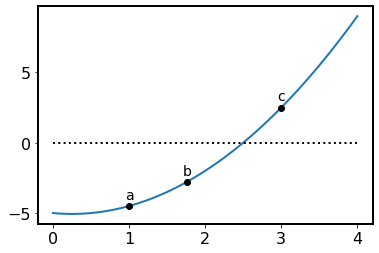

In [89]:
xmin = 0
xmax = 4

xx = np.linspace(xmin, xmax, 100)
def ff(xx):
    return (xx+2)*(xx-2.5)
    
plt.plot(xx, ff(xx))

a = 1
c = 3
# Choose the new point to be at 
b = a + 0.38197*(c-a)
plt.plot([a, b, c], [ff(a), ff(b), ff(c)], 'ko')
plt.plot([xmin, xmax], [0, 0], 'k:')
plt.text(a, ff(a)+0.5, "a", ha="center")
plt.text(b, ff(b)+0.5, "b", ha="center")
plt.text(c, ff(c)+0.5, "c", ha="center")

### Brent's Method ++ 

Many smooth functions are approximately parabolic near a minimum. Brent's Method uses inverse parabolic interpolation to calculate the minimum based on the values of $f(a), f(b), f(c)$. It is called inverse parabolic interpolation because you use the abscissa, not the ordinate. 

Like Brent's Method for root finding, it uses inverse parabolic interpolation so long as it returns sensible results. If it does not, it switches to a "slow but sure" method like Golden Section. 

There are plenty of other methods as well. One big class of methods rely on derivatives of the function, so are analogous to the Newton-Raphson method for root finding. 

### Multi-Dimensional Minimization

Multi-dimensional minimization is another generically hard problem. One reason is that there is no way to guarantee that there is even a local minimum within some region. And it is particularly hard if there are many local minima.

#### Nelder-Mead or Downhill Simplex

This is a fairly robust and elegant method for N-D minimization that involves transforming a "simplex" to move toward the minimum. A simplex is a figure with $N+1$ points in $N$ dimensions. For example in 2-D it is a triangle, in 3-D it is a tetrahedron. 

The basic algorithm is:
1. Start with some vector of values $p_i = p_0 + \lambda e_i$
2. Identify the highest point
3. Reflect that point through the "face" of the simplex and evaluate the function there
4. If that point is better, expand it in that direction, and if it is not, perform a contraction

#### Direction Set (Powell's Method) 

Direction Set and Powell's Method rely on derivatives and consequently can be faster than Nelder-Mead, although are also more prone to issues for more complex functions. 

The basic idea is imagine you are at some point $P$ in N-D. Pick a vector $\vec n$ and use your favorite 1-D method to minimize along this line / direction. How do you pick the direction? If you can compute the derivative, use that. If not, cycle through the N unit vectors. Direction Set and Powell's Method are different ways to choose the direction. 

### SImulated Annealing 

Simulated annealing is a method to approximate the global minimum of a function based on probability, and is often used when the search space is discrete such as the famous "traveling salesman" problem. Discrete problems have special challenges because there may be no concept of direction in the configuration space. 

Simulated annealing gets its name because of the analogy with thermodynamics, and specifically the freezing and crystallization of liquids or the cooling / annealing of metals. A pure crystal is the lowest (or minimum) energy state. This state can be produced by slow cooling, while fast quenching does not (it produces a polycrystalline or amorphous state). 

The basic physical idea is that a system in thermal equilibrium at temperature $T$ has its energy probabilistically  distributed among all different energy states $E$ as: 
$$
P(E) \sim \exp^{-E/kt}
$$
The interpretation is that this is the probability that the system will move away from any energy state, even a local minimum, and potentially find a better minimum, and even the global minimum. The probability weighting penalizes increasing the energy, and penalizes it more at lower temperatures, but does allow it. 

### Metropolis Algorithm

The Metropolis Algorithm was developed by Metropolis and colleagues to apply these physical ideas into a numerical approach. The basic idea is that there is some probability 
$$
P = \exp^{-(E_2 - E_1)/kT}
$$
that the system will change from energy $E_1$ to energy $E_2$. If $E_2 > E_1$, the probability is set to unity, so this always happens. Yet there is still some probability of the step if $E_2 < E_1$. 

The requirements of the Metropolis Algorithm are:
1. A description of possible configurations of the system
2. A function to generate random configuration changes
3. An objective function to minimize, which is the analog of the energy 
4. A control parameter (like the temperature) and an annealing schedule that determines how much and how quickly the control parameter is lowered. 

The Metropolis Algorithm is an adaptation of the Metropolis-Hastings algorithm, which is a Markov chain Monte Carlo method for randomly sampling probability distributions. 